In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
card_transdata = pd.read_csv('card_transdata.csv')

In [7]:
# Basic dataset info
card_transdata.info()

# Check dataset shape
print("Shape of dataset:", card_transdata.shape)

# Display first few rows
card_transdata.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB
Shape of dataset: (999, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


Prompt: Let's start checking for nulls, drop them, and then recheck the dataframe structure

In [8]:
# Check for missing values
card_transdata.isnull().sum()

# Drop rows with any missing values (if there are any)
card_transdata = card_transdata.dropna()

# Recheck structure after cleaning
print("After dropping nulls:")
card_transdata.info()


After dropping nulls:
<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              977 non-null    float64
 1   distance_from_last_transaction  977 non-null    float64
 2   ratio_to_median_purchase_price  977 non-null    float64
 3   repeat_retailer                 977 non-null    float64
 4   used_chip                       977 non-null    float64
 5   used_pin_number                 977 non-null    float64
 6   online_order                    977 non-null    float64
 7   fraud                           977 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 68.7 KB


Prompt: Now let's look at fraud distribution

fraud
0    901
1     76
Name: count, dtype: int64

Percentage distribution:
fraud
0    92.221085
1     7.778915
Name: proportion, dtype: float64


C:\Users\justi\AppData\Local\Temp\ipykernel_23496\3290420889.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=card_transdata, x='fraud', palette='mako')


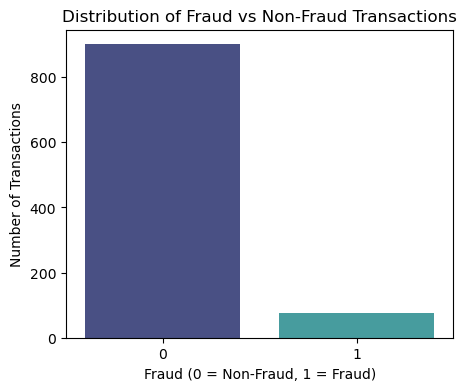

In [10]:
# Check raw counts
print(card_transdata['fraud'].value_counts())

# Check percentages
print("\nPercentage distribution:")
print(card_transdata['fraud'].value_counts(normalize=True) * 100)

# Visualize the distribution
plt.figure(figsize=(5,4))
sns.countplot(data=card_transdata, x='fraud', palette='mako')
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

Prompt: Now, let's look at pin usage distibution

used_pin_number
0.0    860
1.0    117
Name: count, dtype: int64

Percentage distribution:
used_pin_number
0.0    88.024565
1.0    11.975435
Name: proportion, dtype: float64


C:\Users\justi\AppData\Local\Temp\ipykernel_23496\2189950873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=card_transdata, x='used_pin_number', palette='crest')


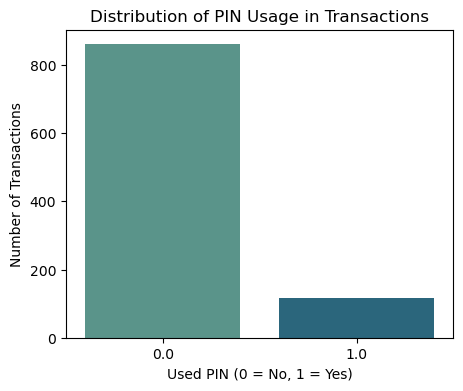

In [11]:
# Count distribution of PIN usage
print(card_transdata['used_pin_number'].value_counts())

# Show percentages
print("\nPercentage distribution:")
print(card_transdata['used_pin_number'].value_counts(normalize=True) * 100)

# Visualize distribution
plt.figure(figsize=(5,4))
sns.countplot(data=card_transdata, x='used_pin_number', palette='crest')
plt.title("Distribution of PIN Usage in Transactions")
plt.xlabel("Used PIN (0 = No, 1 = Yes)")
plt.ylabel("Number of Transactions")
plt.show()


Prompt: Now, repeat retailer and online order

repeat_retailer
1.0    874
0.0    103
Name: count, dtype: int64

Percentage distribution:
repeat_retailer
1.0    89.457523
0.0    10.542477
Name: proportion, dtype: float64


C:\Users\justi\AppData\Local\Temp\ipykernel_23496\2698040791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=card_transdata, x='repeat_retailer', palette='flare')


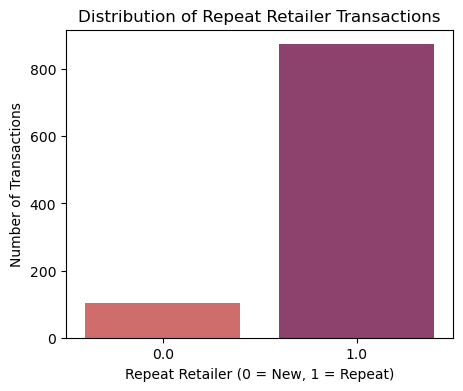

online_order
1.0    658
0.0    319
Name: count, dtype: int64

Percentage distribution:
online_order
1.0    67.349028
0.0    32.650972
Name: proportion, dtype: float64


C:\Users\justi\AppData\Local\Temp\ipykernel_23496\2698040791.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=card_transdata, x='online_order', palette='coolwarm')


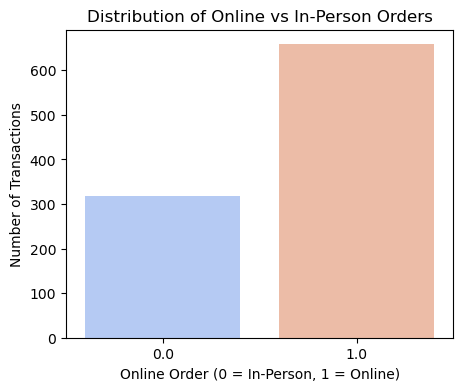

In [12]:
# Count distribution of repeat retailer flag
print(card_transdata['repeat_retailer'].value_counts())

# Percentage distribution
print("\nPercentage distribution:")
print(card_transdata['repeat_retailer'].value_counts(normalize=True) * 100)

# Visualization
plt.figure(figsize=(5,4))
sns.countplot(data=card_transdata, x='repeat_retailer', palette='flare')
plt.title("Distribution of Repeat Retailer Transactions")
plt.xlabel("Repeat Retailer (0 = New, 1 = Repeat)")
plt.ylabel("Number of Transactions")
plt.show()

# Count distribution of online orders
print(card_transdata['online_order'].value_counts())

# Percentage distribution
print("\nPercentage distribution:")
print(card_transdata['online_order'].value_counts(normalize=True) * 100)

# Visualization
plt.figure(figsize=(5,4))
sns.countplot(data=card_transdata, x='online_order', palette='coolwarm')
plt.title("Distribution of Online vs In-Person Orders")
plt.xlabel("Online Order (0 = In-Person, 1 = Online)")
plt.ylabel("Number of Transactions")
plt.show()

Prompt: Now, let's look at the distribution of ratio to median purchase price

count    977.000000
mean       1.654003
std        2.367687
min        0.016933
25%        0.466144
50%        0.944871
75%        1.921046
max       36.074366
Name: ratio_to_median_purchase_price, dtype: float64


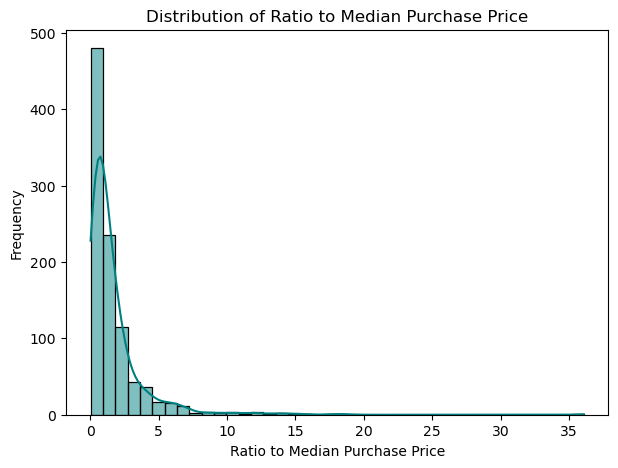

In [13]:
# Summary statistics
print(card_transdata['ratio_to_median_purchase_price'].describe())

# Visualization
plt.figure(figsize=(7,5))
sns.histplot(card_transdata['ratio_to_median_purchase_price'], bins=40, kde=True, color='teal')
plt.title("Distribution of Ratio to Median Purchase Price")
plt.xlabel("Ratio to Median Purchase Price")
plt.ylabel("Frequency")
plt.show()


Prompt: Now look at a bivaritive countplot of pin usage and fraud

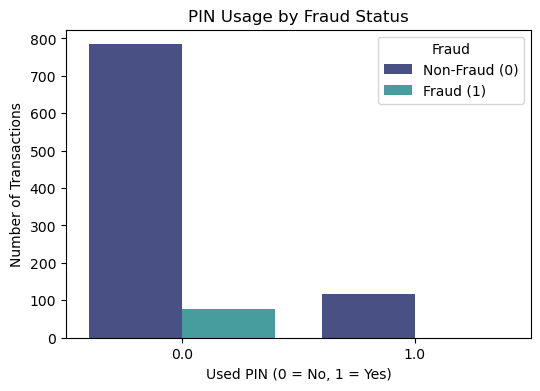

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=card_transdata, x='used_pin_number', hue='fraud', palette='mako')
plt.title("PIN Usage by Fraud Status")
plt.xlabel("Used PIN (0 = No, 1 = Yes)")
plt.ylabel("Number of Transactions")
plt.legend(title="Fraud", labels=["Non-Fraud (0)", "Fraud (1)"])
plt.show()

Prompt: Now, make another graph like that, but with the percentage of fraudulent charges

C:\Users\justi\AppData\Local\Temp\ipykernel_23496\706032785.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_by_pin, x='used_pin_number', y='fraud', palette='viridis')


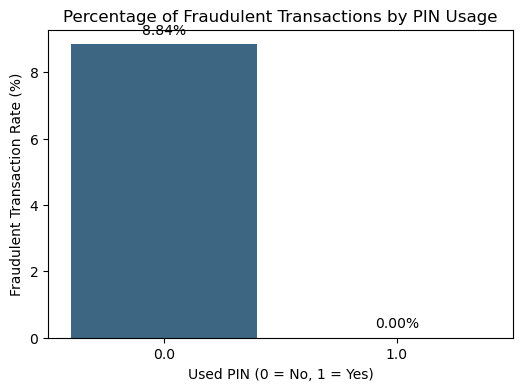

In [15]:
# Calculate fraud rate (%) by PIN usage
fraud_rate_by_pin = (
    card_transdata.groupby('used_pin_number')['fraud']
    .mean()
    .reset_index()
)

# Convert to percentage
fraud_rate_by_pin['fraud'] = fraud_rate_by_pin['fraud'] * 100

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=fraud_rate_by_pin, x='used_pin_number', y='fraud', palette='viridis')
plt.title("Percentage of Fraudulent Transactions by PIN Usage")
plt.xlabel("Used PIN (0 = No, 1 = Yes)")
plt.ylabel("Fraudulent Transaction Rate (%)")

# Annotate bars with percentages
for index, row in fraud_rate_by_pin.iterrows():
    plt.text(index, row['fraud'] + 0.3, f"{row['fraud']:.2f}%", ha='center', fontsize=10)

plt.show()


Prompt: Repeat those last two graphs but with chip usage instead of pin usage

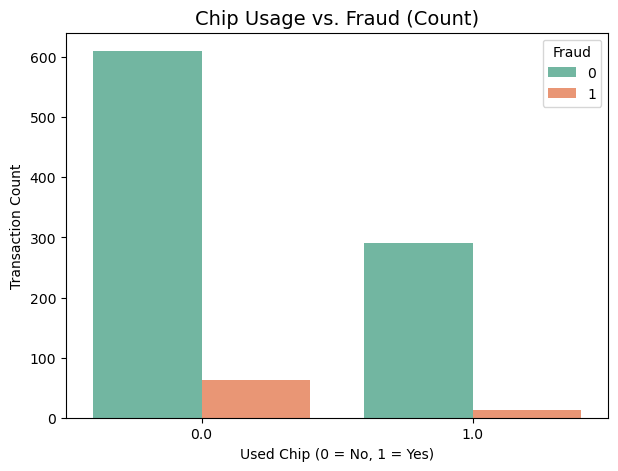

C:\Users\justi\AppData\Local\Temp\ipykernel_23496\2250539221.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_percent_chip, x='used_chip', y='fraud', palette='Set2')


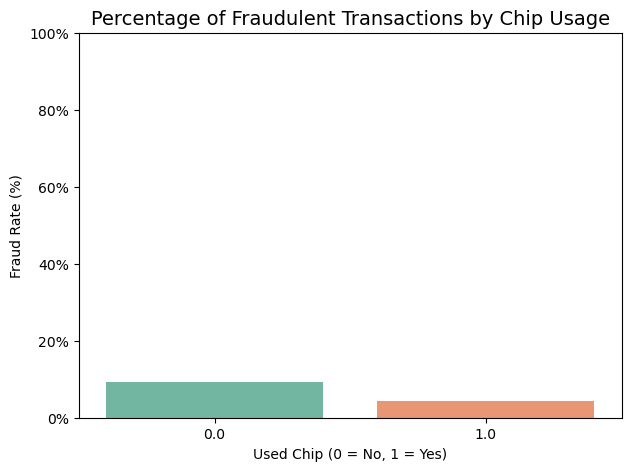

In [18]:
# --- 1. Countplot: Chip Usage vs. Fraud ---
plt.figure(figsize=(7, 5))
sns.countplot(data=card_transdata, x='used_chip', hue='fraud', palette='Set2')
plt.title('Chip Usage vs. Fraud (Count)', fontsize=14)
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud')
plt.show()

# --- 2. Percentage of Fraudulent Transactions by Chip Usage ---
fraud_percent_chip = (
    card_transdata.groupby('used_chip')['fraud']
    .mean()
    .reset_index()
)

plt.figure(figsize=(7, 5))
sns.barplot(data=fraud_percent_chip, x='used_chip', y='fraud', palette='Set2')
plt.title('Percentage of Fraudulent Transactions by Chip Usage', fontsize=14)
plt.xlabel('Used Chip (0 = No, 1 = Yes)')
plt.ylabel('Fraud Rate (%)')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.show()


Prompt: Once again with online order instead of pin usage

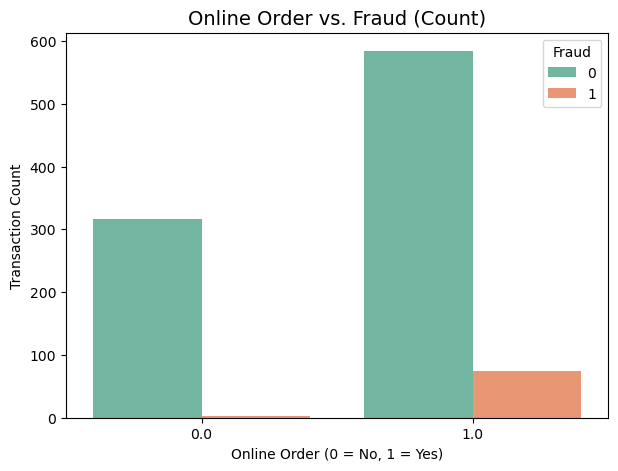

C:\Users\justi\AppData\Local\Temp\ipykernel_23496\822585835.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_percent_online, x='online_order', y='fraud', palette='Set2')


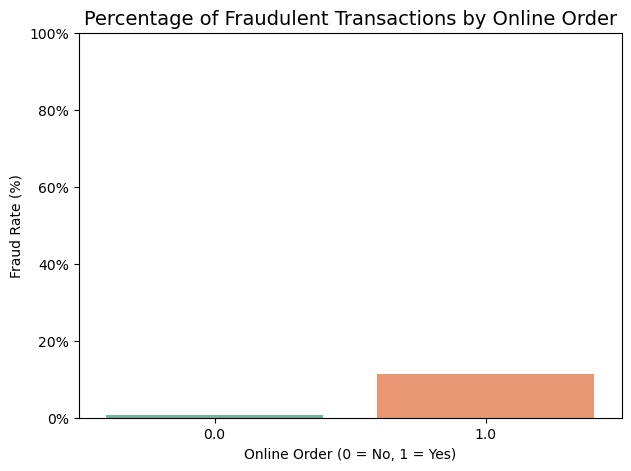

In [19]:
# --- 1. Countplot: Online Order vs. Fraud ---
plt.figure(figsize=(7, 5))
sns.countplot(data=card_transdata, x='online_order', hue='fraud', palette='Set2')
plt.title('Online Order vs. Fraud (Count)', fontsize=14)
plt.xlabel('Online Order (0 = No, 1 = Yes)')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud')
plt.show()

# --- 2. Percentage of Fraudulent Transactions by Online Order ---
fraud_percent_online = (
    card_transdata.groupby('online_order')['fraud']
    .mean()
    .reset_index()
)

plt.figure(figsize=(7, 5))
sns.barplot(data=fraud_percent_online, x='online_order', y='fraud', palette='Set2')
plt.title('Percentage of Fraudulent Transactions by Online Order', fontsize=14)
plt.xlabel('Online Order (0 = No, 1 = Yes)')
plt.ylabel('Fraud Rate (%)')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.show()


Prompt: Scatter plot of fraudulent v non-fraud charges on distance from home v ratio to median purchase price

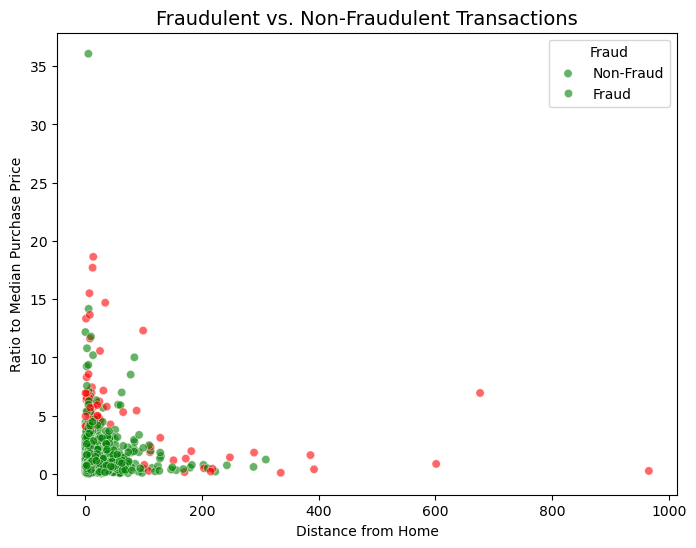

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=card_transdata,
    x='distance_from_home',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)
plt.title('Fraudulent vs. Non-Fraudulent Transactions', fontsize=14)
plt.xlabel('Distance from Home')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()
